# Study MESA models of $\zeta$ Ophiuchi
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
def get_epsilon_he(X, Y, Mtot=20, dq=1e-8):
    """
    convert mass fractions from MESA to the epslion spectroscopists like
    
    inputs:

    X, Y mass fractions of hydrogen and helium respectively,
    Mtot total mass
    dq fraction of the total mass that is the surface, 1e-8 is the MESA default

    output: epsilon_he = N(He)/(N(H)+N(He)) with N number abundance (?)

    TODO: verify this makes sense
    """
    # From $MESA_DIR/const/public/const_def.f90
    mp = 1.67262192369e-24 # grams
    mhe = 4*mp # neglects the binding energy of the he4 atom
    # get mass of the photosphere in grams
    mass = Mtot*Msun*dq
    # get number abundances from mass and mass fractions
    N_h = mass*X/mp
    N_he = mass*Y/mhe
    # calculate epsilon
    epsilon = N_he/(N_h+N-he)
    return epsilon

def get_epsilon(mass_frac, X):
    """
    convert mass fractions from MESA to the epslion spectroscopists like
    
    inputs:

    X mass fraction of hydrogen
    mass_frac mass fractions of the wanted element
    
    output: 12+log(mass_frac/X)

    TODO: verify this makes sense
    """
    return 12+np.log10(mass_frac/X)


In [4]:
#Spectral type: O9.5Vnn
# xi=15 # no idea what this is

def get_zeta_oph_vsini():
    """
    returns the vsini and error from Villamariz & Herrero 05
    """
    vsini = 400 #km/s
    err_vsini = 20 #km/s
    return vsini, err_vsini


def zeta_oph_epsilon_he(ax):
    """
    plots the epsilon_he and error on ax
    data from Villamariz & Herrero 05
    """
    epsilon_he = 0.11  ## N(He/(N(H)+N(He)))
    err_epsilon_he_up = 0.05  # estimated from the range of values they explore
    err_epsilon_he_down=0.02
    ax.errorbar(epslion_he, yerr=[err_epsilon_he_up,err_epsilon_he_down], fmt='o', color='r', zorder=1)

def zeta_oph_radius(ax):
    """
    plots the radius and error on ax
    data from Villamariz & Herrero 05
    """
    R = 8.3 #Rsun
    err_R = 1.5
    ax.errorbar(R, yerr=err_R, fmt='o', color='r', zorder=1)


def zeta_oph_mass(ax):
    """
    plots the mass and error on ax
    data from Villamariz & Herrero 05
    """
    M = 19 #Msun
    err_M = 11
    ax.errorbar(M, yerr=err_M, fmt='o', color='r', zorder=1)


def zeta_oph_spectroscopicHRD(ax):
    """
    plots Zeta ophiuchi logg and Teff on ax
    data from Villamariz & Herrero 05
    """
    logg = 3.7 #cm/s^2
    err_log_g = 0.15  # estimated from the range of values they explore
    Teff = 34000 #K
    err_Teff = 1500 # K # estimated from the range of Teff they explore
    # take log10
    log_Teff = np.log10(Teff)
    err_log_Teff = err_Teff/(Teff*np.log(10))
    ax.errorbar(log_Teff, logg, xerr=err_log_Teff, yerr=err_log_g, fmt='o', color='r', zorder=1)
    
    
def zeta_oph_HRD(ax):
    """
    plots Zeta ophiuchi L and Teff on ax
    data from Villamariz & Herrero 05
    """
    Teff = 34000 #K
    err_Teff = 1500 # K # estimated from the range of Teff they explore
    # take log10
    log_Teff = np.log10(Teff)
    err_log_Teff = err_Teff/(Teff*np.log(10))
    #visual magnitude
    # Mv = -4.2 # taken from Howarth & Prinja 1989
    L = 8.3e4 #Lsun
    err_L = 4e4
    # take log10
    log_L = np.log10(L)
    err_log_L = err_L/(L*np.log(10))
    ax.errorbar(log_Teff, log_L, xerr=err_log_Teff, yerr=err_log_L, fmt='o', color='r', zorder=1)

In [5]:
# this cell defines some paths to the MESA results
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/"
# Z=0.02
binary = root+"/fiducial/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_from_model = root+"/fiducial/accretor_to_TAMS/from_model/LOGS/"
# accretor_to_TAMS_from_photo = root+"/fiducial/accretor_to_TAMS/from_photo/LOGS/"
accretor_from_TAMS_to_Cdepl = root+"/fiducial/accretor_TAMS_to_C_depl/LOGS/"

# varying Z
binary_Z001 = root+"/Z0.001/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z001 = root+"/Z0.001/accretor_to_TAMS/LOGS/"

binary_Z005 = root+"/Z0.005/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z005 =root+"/Z0.005/accretor_to_TAMS/LOGS/"

binary_Z01 = root+"/Z0.01/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z01 =root+"/Z0.01/accretor_to_TAMS/LOGS/"

# comparison single stars at Z=0.02
single_star_root = root+"/fiducial/single_star_comparison/"

Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


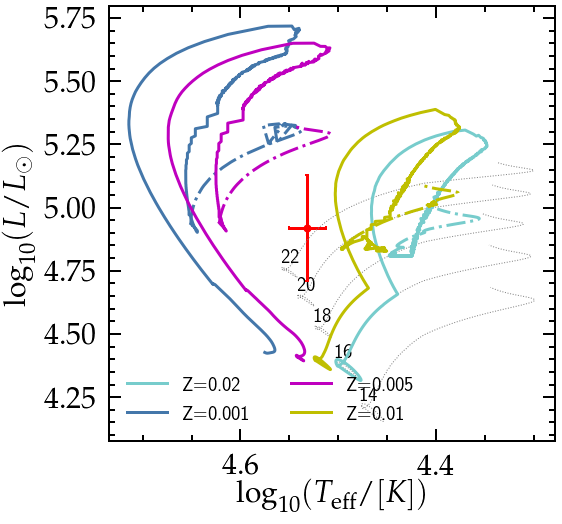

In [6]:
# plot HRD
def getlogLlogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    logL = src[:, col.index("log_L")]
    return logL, log_Teff


def plot_HRD(ax, hfile1, c1='#77CCCC', hfile2="", label=""):
    logL, logTeff = getlogLlogTeff(hfile1)
    ax.plot(logTeff, logL, c=c1, zorder=2, label=label)
    # post binary evolution part is optional
    if hfile2 != "":
        logL, logTeff = getlogLlogTeff(hfile2)
        ax.plot(logTeff, logL, c=c1, ls='-.', zorder=2)

# now make the plot --------------------------------------------
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# single stars for reference -- these have Z=0.02
for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logL, logTeff = getlogLlogTeff(hsingle)
    ax.plot(logTeff, logL, c='#808080',lw=1, ls=':')
    mass = single_star.split('/')[-2]
    ax.text(logTeff[0]+0.001, logL[0]+0.02, mass, fontsize=20, zorder=0)

# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_HRD(ax, hfile1, c1='#77CCCC', hfile2=hfile2, label=r"Z=0.02")

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--', zorder=2)

# uncomment this to show the evolution until C depletion
# hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile3)
# ax.plot(logTeff, logL, c='#114477', zorder=2)
# -----------------------------------------------------------
# # Z = 0.001 
hfile1 = binary_Z001+'/history.data'
hfile2 = accretor_to_TAMS_Z001+'/history.data'
plot_HRD(ax, hfile1, c1='#4477AA', hfile2=hfile2, label="Z=0.001")
# -----------------------------------------------------------
# # Z = 0.005
hfile1 = binary_Z005+'/history.data'
hfile2 = accretor_to_TAMS_Z005+'history.data'
plot_HRD(ax, hfile1, c1='m', hfile2=hfile2, label="Z=0.005")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_HRD(ax, hfile1, c1='y', hfile2=hfile2, label="Z=0.01")

ax.legend(ncol=2, fontsize=20)

zeta_oph_HRD(ax)
    
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")

Text(0, 0.5, '$v_\\mathrm{rot} \\ \\mathrm{[km\\ s^{-1}]}$')

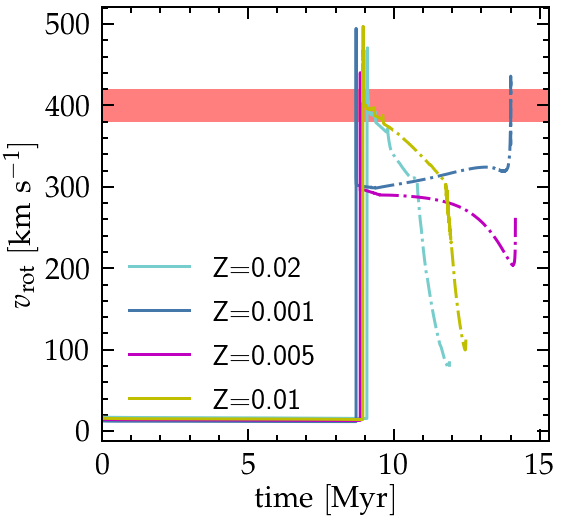

In [7]:
# rotation history
def get_surface_rotation_time(hfile):
    src, col = getSrcCol(hfile)
    t  =src[:, col.index("star_age")]*1e-6
    v = src[:, col.index("surf_avg_v_rot")]
    return t,v 

def plot_surface_rotation_time(ax, hfile1, c1='#77CCCC', hfile2="", label=""):
    t,v = get_surface_rotation_time(hfile1)    
    ax.plot(t, v, c=c1, zorder=2, label=label)
    # post binary evolution part is optional
    if hfile2 != "":
        t,v = get_surface_rotation_time(hfile2)    
        ax.plot(t, v, c=c1, zorder=2, ls='-.')

    
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# Z = 0.02
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_surface_rotation_time(ax, hfile1, c1='#77CCCC', hfile2=hfile2, label="Z=0.02")

# Z = 0.001 
hfile1 = binary_Z001+'/history.data'
hfile2 = accretor_to_TAMS_Z001+'/history.data'
plot_surface_rotation_time(ax, hfile1, c1='#4477AA', hfile2=hfile2, label="Z=0.001")

# # Z = 0.005
hfile1 = binary_Z005+'/history.data'
hfile2 = accretor_to_TAMS_Z005+'history.data'
plot_surface_rotation_time(ax, hfile1, c1='m', hfile2=hfile2, label="Z=0.005")

# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_surface_rotation_time(ax, hfile1, c1='y', hfile2=hfile2, label="Z=0.01")


# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
ax.set_xlim(0, 15.3)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.legend(loc="lower left")
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_ylabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")

Text(0, 0.5, '$\\omega/\\omega_\\mathrm{crit}$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


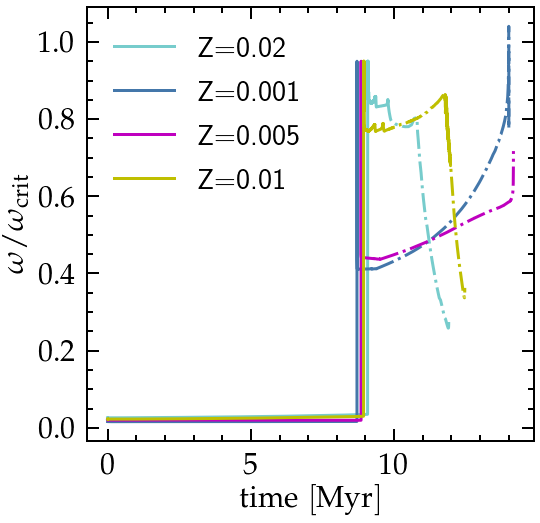

In [10]:
# omega_div_omega_crit vs. time
def get_omega_time(hfile):
    src, col = getSrcCol(hfile)
    omega_div_omega_crit = src[:, col.index("surf_avg_omega_div_omega_crit")]
    t = src[:, col.index("star_age")]*1e-6 # in Myr
    return t, omega_div_omega_crit

def plot_omega_div_omega_crit(ax, hfile1, c1="#77CCCC", hfile2="", label=""):
    t, omega_div_omega_crit = get_omega_time(hfile1)
    ax.plot(t, omega_div_omega_crit, c=c1, label=label, zorder=2)
    if hfile2 != "":
        t, omega_div_omega_crit = get_omega_time(hfile2)
        ax.plot(t, omega_div_omega_crit, c=c1, ls='-.',zorder=2)

# now make plot
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])



# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c1='#77CCCC', hfile2=hfile2, label=r"Z=0.02")

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--', zorder=2)

# uncomment this to show the evolution until C depletion
# hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile3)
# ax.plot(logTeff, logL, c='#114477', zorder=2)
# -----------------------------------------------------------
# # Z = 0.001 
hfile1 = binary_Z001+'/history.data'
hfile2 = accretor_to_TAMS_Z001+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c1='#4477AA', hfile2=hfile2, label="Z=0.001")
# -----------------------------------------------------------
# # Z = 0.005
hfile1 = binary_Z005+'/history.data'
hfile2 = accretor_to_TAMS_Z005+'history.data'
plot_omega_div_omega_crit(ax, hfile1, c1='m', hfile2=hfile2, label="Z=0.005")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c1='y', hfile2=hfile2, label="Z=0.01")


ax.legend()
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_ylabel(r"$\omega/\omega_\mathrm{crit}$")

Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

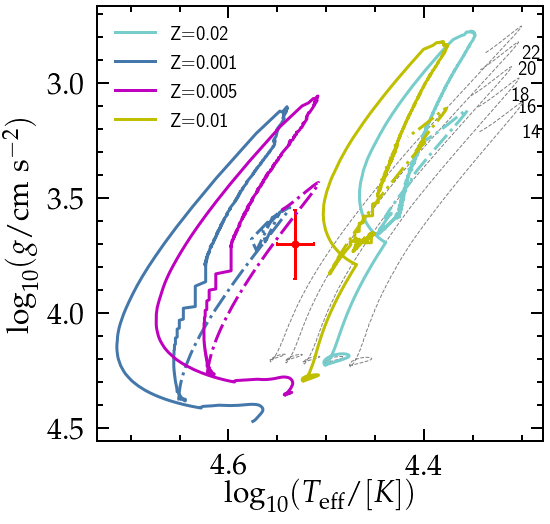

In [8]:
# spectroscopic HRD
def getlogglogTeff(hfile):
    src, col = getSrcCol(hfile)
    log_Teff = src[:, col.index("log_Teff")]
    log_g = src[:, col.index("log_g")]
    return log_g, log_Teff


def plot_spectroscopic_HRD(ax, hfile1, c1='#77CCCC', hfile2="", label=""):
    logg, logTeff = getlogglogTeff(hfile1)
    ax.plot(logTeff, logg, c=c1, zorder=2, label=label)
    # post binary evolution part is optional
    if hfile2 != "":
        logg, logTeff = getlogglogTeff(hfile2)
        ax.plot(logTeff, logg, c=c1, ls='-.', zorder=2)


# now make plot
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logg, logTeff = getlogglogTeff(hsingle)
    ax.plot(logTeff, logg, c='#808080',lw=1, ls='--')
    mass = single_star.split('/')[-2]
    ax.text(min(logTeff), logg[-1]+0.02, mass, fontsize=20, zorder=0)


# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c1='#77CCCC', hfile2=hfile2, label=r"Z=0.02")

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--', zorder=2)

# uncomment this to show the evolution until C depletion
# hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile3)
# ax.plot(logTeff, logL, c='#114477', zorder=2)
# -----------------------------------------------------------
# # Z = 0.001 
hfile1 = binary_Z001+'/history.data'
hfile2 = accretor_to_TAMS_Z001+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c1='#4477AA', hfile2=hfile2, label="Z=0.001")
# -----------------------------------------------------------
# # Z = 0.005
hfile1 = binary_Z005+'/history.data'
hfile2 = accretor_to_TAMS_Z005+'history.data'
plot_spectroscopic_HRD(ax, hfile1, c1='m', hfile2=hfile2, label="Z=0.005")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c1='y', hfile2=hfile2, label="Z=0.01")




zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")

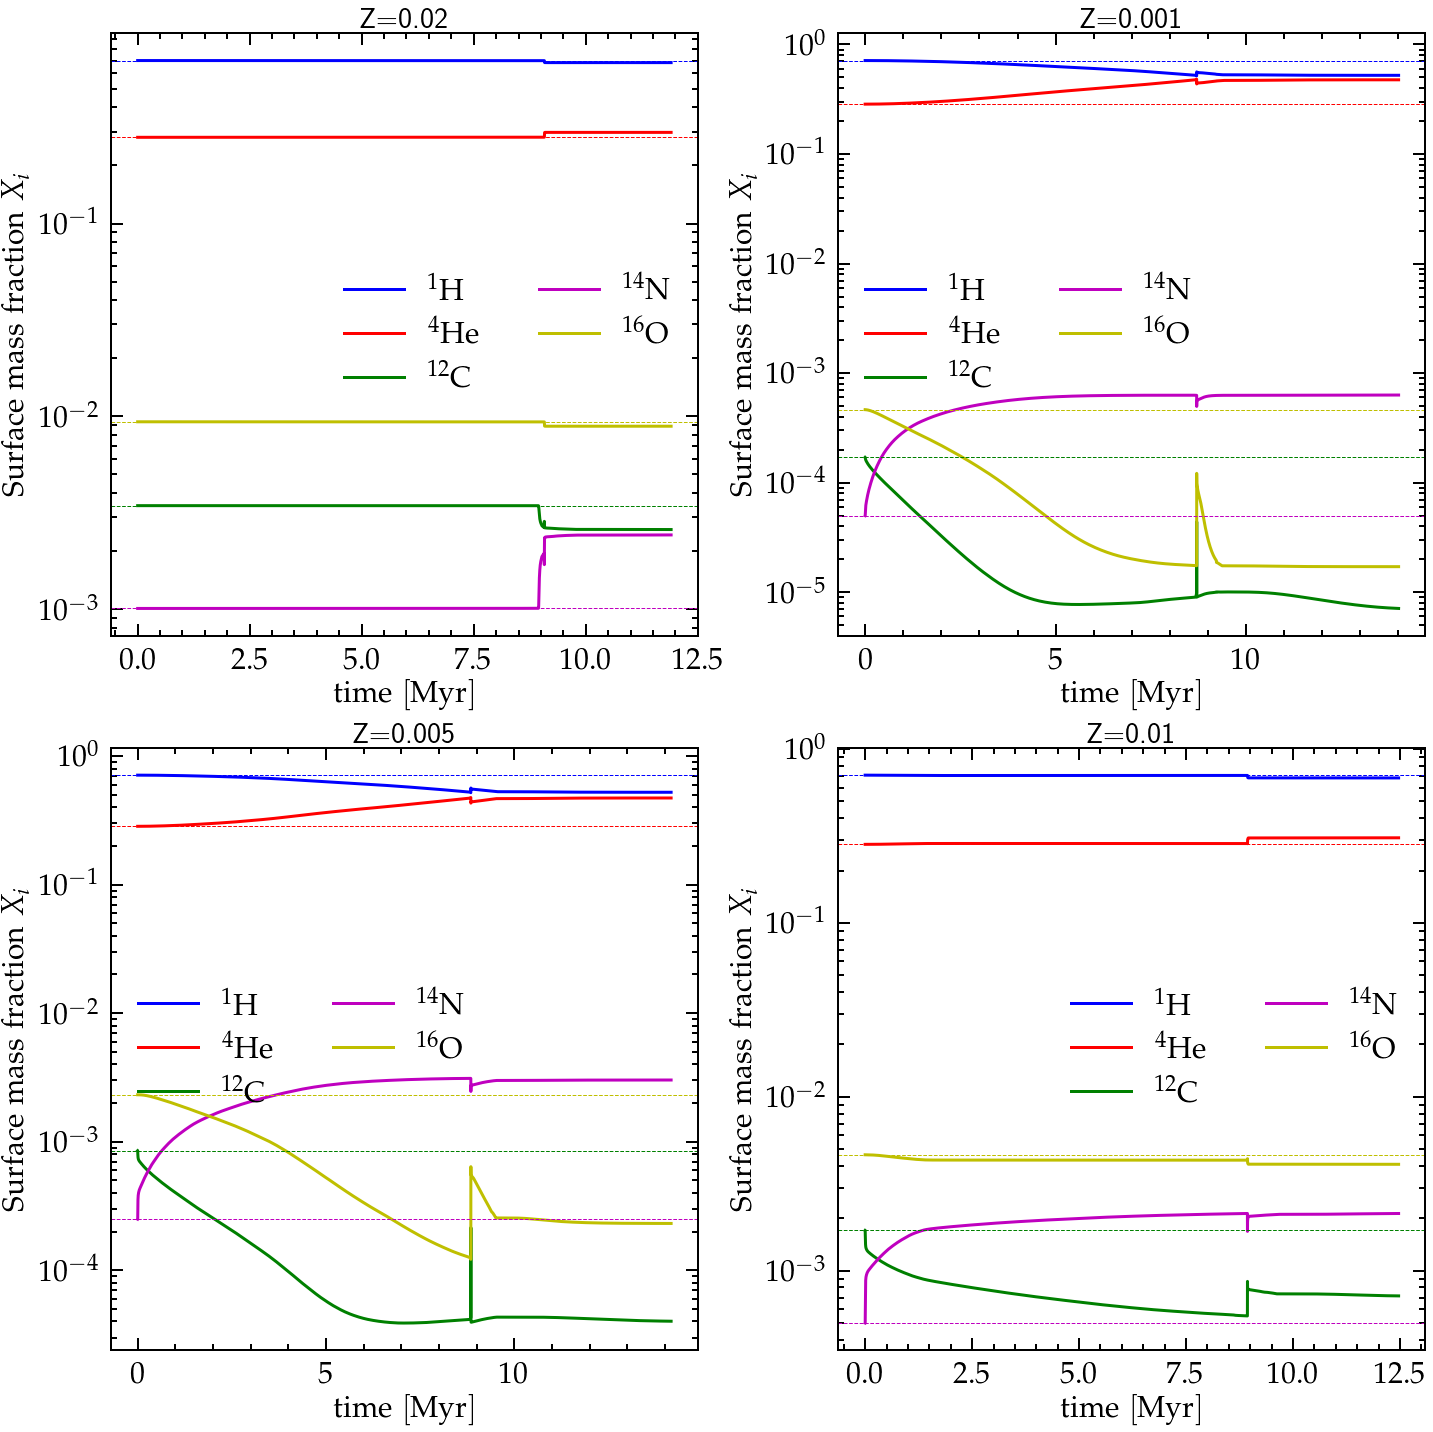

In [15]:
# surface composition
# He surface abundance vs. time
def plot_surface_abundances(hfile1, hfile2="", ax="", label=""):
    """
    plot the surface abundances of a few isotopes
    the post binary evolution is optional
    """
    src, col = getSrcCol(hfile1)
    
    he4_1 = src[:, col.index("surface_he4")]
    h1_1  = src[:, col.index("surface_h1")]
    n14_1 = src[:, col.index("surface_n14")]
    c12_1 = src[:, col.index("surface_c12")]
    o16_1 = src[:, col.index("surface_o16")]
    t_1   = src[:, col.index("star_age")]*1e-6
         
    if hfile2 != "":
        src2, col2 = getSrcCol(hfile2)
        he4_2 = src2[:, col2.index("surface_he4")]
        h1_2   = src2[:, col2.index("surface_h1")]
        n14_2 = src2[:, col2.index("surface_n14")]
        c12_2 = src2[:, col2.index("surface_c12")]
        o16_2 = src2[:, col2.index("surface_o16")]
        t_2   = src2[:, col2.index("star_age")]*1e-6

        he4 = np.concatenate((he4_1, he4_2))
        h1  = np.concatenate((h1_1, h1_2 ))
        n14 = np.concatenate((n14_1, n14_2))
        c12 = np.concatenate((c12_1, c12_2))
        o16 = np.concatenate((o16_1, o16_2))
        t   = np.concatenate((t_1, t_2))
    else:
        he4 = he4_1
        h1  = h1_1 
        n14 = n14_1
        c12 = c12_1
        o16 = o16_1
        t   = t_1      

    if ax == "":
        # create plot figure if ax is not passed    
        fig = plt.figure()
        gs = gridspec.GridSpec(100, 100)
        ax = fig.add_subplot(gs[:,:])

    if label != "":
        ax.set_title(label, fontsize=30)

    ax.plot(t, h1,  c='b', label=r"$^1\mathrm{H}$")
    ax.plot(t, he4, c='r', label=r"$^4\mathrm{He}$")    
    ax.plot(t, c12, c='g', label=r"$^{12}\mathrm{C}$")
    ax.plot(t, n14, c='m', label=r"$^{14}\mathrm{N}$")
    ax.plot(t, o16, c='y', label=r"$^{16}\mathrm{O}$")

    ax.axhline(h1[0],0,1, c='b',ls='--', lw=1)
    ax.axhline(he4[0],0,1,c='r',ls='--', lw=1 )
    ax.axhline(n14[0],0,1,c='m',ls='--', lw=1 )
    ax.axhline(c12[0],0,1,c='g',ls='--', lw=1 )
    ax.axhline(o16[0],0,1,c='y',ls='--', lw=1 )

    ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
    ax.set_ylabel(r"$\mathrm{Surface\ mass\ fraction}\ X_i$")
    # ax.set_xlim(xmin=8.5, xmax=10)
    ax.set_yscale('log')
    ax.legend(ncol=2)

    
# make large plot with all the compositions
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(2, 2)

# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
ax = fig.add_subplot(gs[0])
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label=r"Z=0.02")
# -----------------------------------------------------------
# # Z = 0.001 
hfile1 = binary_Z001+'/history.data'
hfile2 = accretor_to_TAMS_Z001+'/history.data'
ax = fig.add_subplot(gs[1])
plot_surface_abundances(hfile1, hfile2=hfile2,ax=ax, label="Z=0.001")
# -----------------------------------------------------------
# # Z = 0.005
hfile1 = binary_Z005+'/history.data'
hfile2 = accretor_to_TAMS_Z005+'history.data'
ax = fig.add_subplot(gs[2])
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="Z=0.005")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
ax = fig.add_subplot(gs[3])
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="Z=0.01")




/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/mesaPlot-0.0-py3.7.egg/mesaPlot/plot.py:981: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


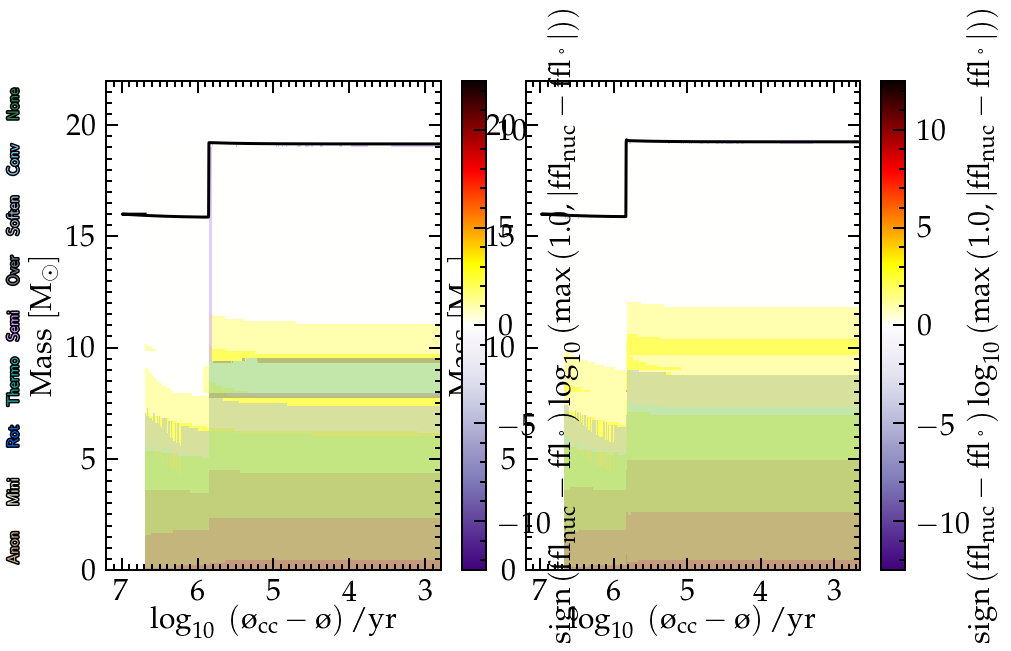

In [9]:
# Kippenhahn diagram
def Kippenhahn_combined(binary, accretor_to_TAMS, figname=""):
    fig = plt.figure(figsize=(15,9))
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:50])
    bx = fig.add_subplot(gs[:,50:])

    x = 'star_age' # 'model_number' #
    y = 'mass'

    mmm.loadHistory(f=binary)
    ppp.plotKip3(mmm, fig=fig, ax=ax,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.45, cmax=12.5)

    mmm.loadHistory(f=accretor_to_TAMS)
    ppp.plotKip3(mmm, fig=fig, ax=bx,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 cmin=-12.45, cmax=12.5)

    ax.set_ylim(0, 22)
    bx.set_ylim(ax.get_ylim())

Kippenhahn_combined(binary, binary_Z01)
    